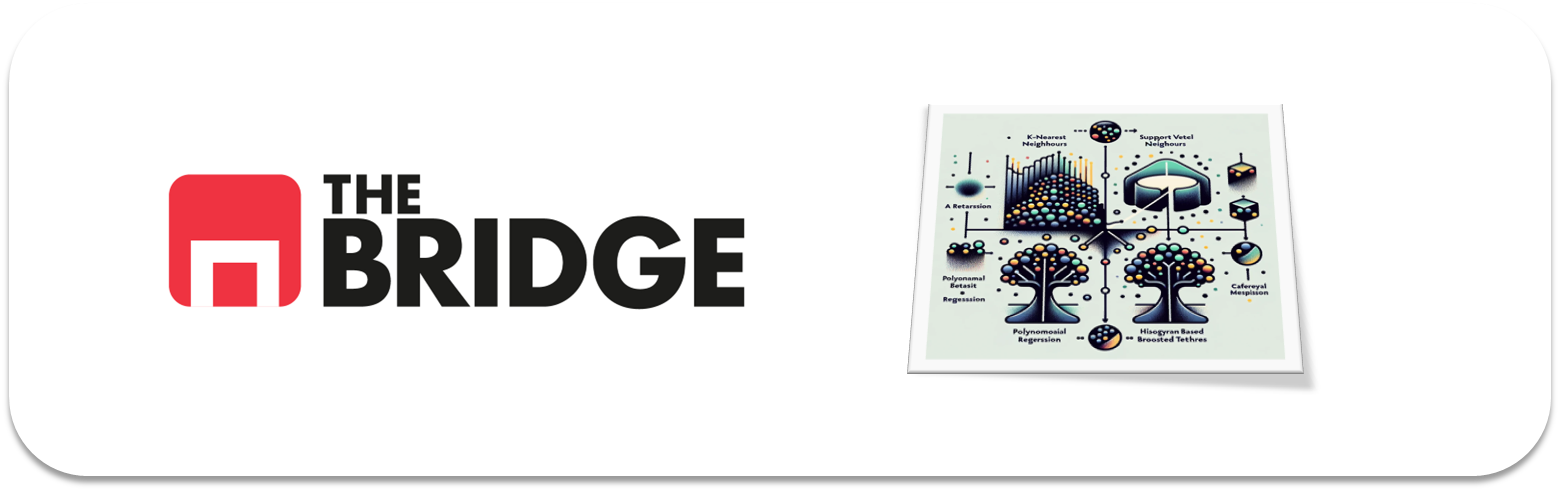

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [4]:
# Cargar el dataset desde la ubicación especificada
ruta = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Sprint_12\Unidad_01\Practica_Obligatoria\data\credit_npo.csv"
df_original = pd.read_csv(ruta)

# Hacer una copia
df = df_original.copy()

In [6]:
# Resumen general del DataFrame
df.info()

# Resumen estadístico de las variables numéricas
df.describe()

# Inspección inicial de los primeros registros para entender las variables
df.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [7]:
# Clasificación inicial de variables
variables_categoricas = []
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables categóricas:", variables_categoricas)
print("Variables numéricas:", variables_numericas)

Variables categóricas: []
Variables numéricas: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


- Variables categóricas: Ninguna (todas las variables son numéricas).
- Variables numéricas: SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents.

In [8]:
# Ajustar clasificación según interpretación
categorias_codificadas = ['SeriousDlqin2yrs']  # Variables numéricas pero categóricas
for col in categorias_codificadas:
    variables_categoricas.append(col)
    variables_numericas.remove(col)

print("Variables categóricas ajustadas:", variables_categoricas)
print("Variables numéricas ajustadas:", variables_numericas)

Variables categóricas ajustadas: ['SeriousDlqin2yrs']
Variables numéricas ajustadas: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


- Variables categóricas: SeriousDlqin2yrs.
- Variables numéricas: El resto de las columnas.

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

La variable objetivo, SeriousDlqin2yrs.

- La variable SeriousDlqin2yrs tiene valores binarios (0 y 1), según la descripción inicial y la muestra del dataset.
- Esto indica que se trata de un problema de clasificación binaria.

Tipo de problema: Clasificación binaria.

- La columna SeriousDlqin2yrs representa si una persona ha tenido dificultades financieras graves en los últimos dos años.
- Esta será la variable target.

La clasificación binaria es adecuada porque:

- Hay dos posibles resultados: 0 (sin problemas financieros) y 1 (con problemas financieros).
- Modelos de clasificación como KNN, regresión logística y otros funcionan bien con este tipo de datos.

In [9]:
# Determinar el tipo de problema
print("Tipo de problema: Clasificación binaria")

# Definir la variable target
target = 'SeriousDlqin2yrs'
print(f"Variable target: {target}")


Tipo de problema: Clasificación binaria
Variable target: SeriousDlqin2yrs


### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [10]:
# Calcular distribución de frecuencias
frecuencias = df['SeriousDlqin2yrs'].value_counts(normalize=True)
print("Distribución de frecuencias:")
print(frecuencias)


Distribución de frecuencias:
SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64


C:\Users\migue\AppData\Local\Temp\ipykernel_56460\538556037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SeriousDlqin2yrs', data=df, palette="viridis")


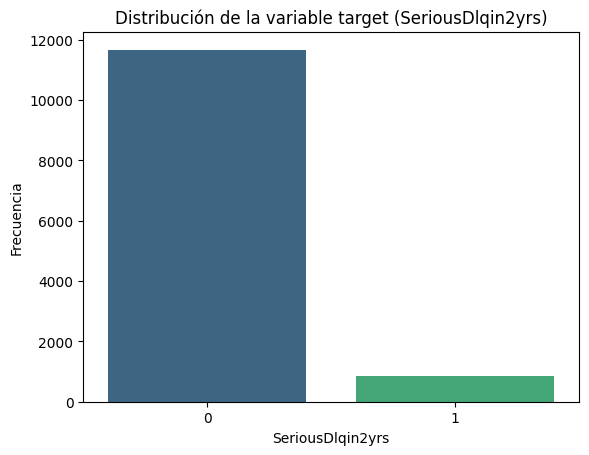

In [11]:
# Graficar distribución
sns.countplot(x='SeriousDlqin2yrs', data=df, palette="viridis")
plt.title("Distribución de la variable target (SeriousDlqin2yrs)")
plt.xlabel("SeriousDlqin2yrs")
plt.ylabel("Frecuencia")
plt.show()

- Clase 0 (sin dificultades financieras): 93.11%.
- Clase 1 (con dificultades financieras): 6.89%.

Se confirma un problema de desbalanceo de clases, ya que la mayoría de los datos corresponden a la clase 0. 

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [15]:
# Manejo de valores faltantes sin inplace
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())

print("Valores nulos después de reemplazo:\n", df.isnull().sum())

# Separar características y target
X = df.drop(columns='SeriousDlqin2yrs')
y = df['SeriousDlqin2yrs']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nDistribución de la variable target en el conjunto de entrenamiento:\n", y_train.value_counts(normalize=True))

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nEscalado de características completado.")

Valores nulos después de reemplazo:
 SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Distribución de la variable target en el conjunto de entrenamiento:
 SeriousDlqin2yrs
0    0.9311
1    0.0689
Name: proportion, dtype: float64

Escalado de características completado.


### Balancear las Clases

In [16]:
# Aplicar SMOTE el cual nos sirve para generar ejemplos sintéticos de la clase minoritaria en el conjunto de entrenamiento.
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verificar la distribución balanceada
print("\nDistribución de la variable target después de SMOTE:\n", y_train_balanced.value_counts(normalize=True))


Distribución de la variable target después de SMOTE:
 SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


### KNN

In [17]:
# Entrenar KNN
knn = KNeighborsClassifier()
knn.fit(X_train_balanced, y_train_balanced)

# Evaluar KNN
y_pred_knn = knn.predict(X_test_scaled)
print("\nResultados de KNN:\n", classification_report(y_test, y_pred_knn))


Resultados de KNN:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      2335
           1       0.22      0.52      0.31       173

    accuracy                           0.84      2508
   macro avg       0.59      0.69      0.61      2508
weighted avg       0.91      0.84      0.87      2508



### Regresión Logística

In [19]:
# Entrenar Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train_balanced, y_train_balanced)

# Evaluar Regresión Logística
y_pred_logreg = logreg.predict(X_test_scaled)
print("\nResultados de Regresión Logística:\n", classification_report(y_test, y_pred_logreg))



Resultados de Regresión Logística:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85      2335
           1       0.18      0.71      0.29       173

    accuracy                           0.76      2508
   macro avg       0.58      0.74      0.57      2508
weighted avg       0.92      0.76      0.81      2508



### Random Forest

In [20]:
# Entrenar Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Evaluar Random Forest
y_pred_rf = rf.predict(X_test_scaled)
print("\nResultados de Random Forest:\n", classification_report(y_test, y_pred_rf))


Resultados de Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2335
           1       0.46      0.36      0.41       173

    accuracy                           0.93      2508
   macro avg       0.71      0.67      0.68      2508
weighted avg       0.92      0.93      0.92      2508



### Validación cruzada

In [21]:
# Validación cruzada
scores_knn = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring='recall')
scores_logreg = cross_val_score(logreg, X_train_balanced, y_train_balanced, cv=5, scoring='recall')
scores_rf = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=5, scoring='recall')

print("\nRecall medio (KNN):", scores_knn.mean())
print("Recall medio (Regresión Logística):", scores_logreg.mean())
print("Recall medio (Random Forest):", scores_rf.mean())


Recall medio (KNN): 0.9815805681686545
Recall medio (Regresión Logística): 0.7605492786352391
Recall medio (Random Forest): 0.9486033772647666


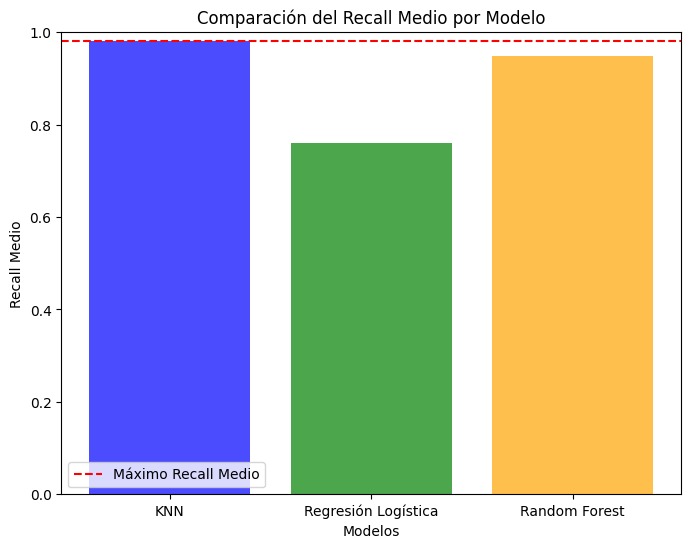

In [22]:
# Resultados de recall medio
modelos = ['KNN', 'Regresión Logística', 'Random Forest']
recall_medios = [0.9815805681686545, 0.7605492786352391, 0.9486033772647666]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(modelos, recall_medios, color=['blue', 'green', 'orange'], alpha=0.7)
plt.title("Comparación del Recall Medio por Modelo")
plt.ylabel("Recall Medio")
plt.ylim(0, 1)
plt.xlabel("Modelos")
plt.axhline(y=max(recall_medios), color='red', linestyle='--', label="Máximo Recall Medio")
plt.legend()
plt.show()

- El gráfico muestra claramente que KNN tiene el mejor recall medio, seguido de Random Forest y, finalmente, Regresión Logística.
- La línea roja punteada indica el valor máximo de recall medio (KNN en este caso).

### Optimización de KNN

In [23]:
# Definir los hiperparámetros a probar
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train_balanced, y_train_balanced)

# Mejor modelo KNN
best_knn = grid_search_knn.best_estimator_
print("\nMejores hiperparámetros para KNN:", grid_search_knn.best_params_)

# Evaluar el modelo optimizado en el conjunto de prueba
y_pred_knn_optimized = best_knn.predict(X_test_scaled)
print("\nResultados del KNN optimizado:\n", classification_report(y_test, y_pred_knn_optimized))


Mejores hiperparámetros para KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

Resultados del KNN optimizado:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      2335
           1       0.22      0.54      0.31       173

    accuracy                           0.84      2508
   macro avg       0.59      0.70      0.61      2508
weighted avg       0.91      0.84      0.87      2508



In [24]:
# Resultados de Random Forest
y_pred_rf = rf.predict(X_test_scaled)
print("\nResultados de Random Forest:\n", classification_report(y_test, y_pred_rf))

# Resultados de Regresión Logística
y_pred_logreg = logreg.predict(X_test_scaled)
print("\nResultados de Regresión Logística:\n", classification_report(y_test, y_pred_logreg))

# Métricas clave basado en el recall de la clase minoritaria (1).
modelos = ['KNN Optimizado', 'Random Forest', 'Regresión Logística']
recall_scores = [
    recall_score(y_test, y_pred_knn_optimized),  # KNN
    recall_score(y_test, y_pred_rf),  # Random Forest
    recall_score(y_test, y_pred_logreg)  # Logistic Regression
]

# Mostrar los recalls
print("\nRecall para cada modelo:")
for modelo, recall in zip(modelos, recall_scores):
    print(f"{modelo}: {recall:.2f}")


Resultados de Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2335
           1       0.46      0.36      0.41       173

    accuracy                           0.93      2508
   macro avg       0.71      0.67      0.68      2508
weighted avg       0.92      0.93      0.92      2508


Resultados de Regresión Logística:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85      2335
           1       0.18      0.71      0.29       173

    accuracy                           0.76      2508
   macro avg       0.58      0.74      0.57      2508
weighted avg       0.92      0.76      0.81      2508


Recall para cada modelo:
KNN Optimizado: 0.54
Random Forest: 0.36
Regresión Logística: 0.71


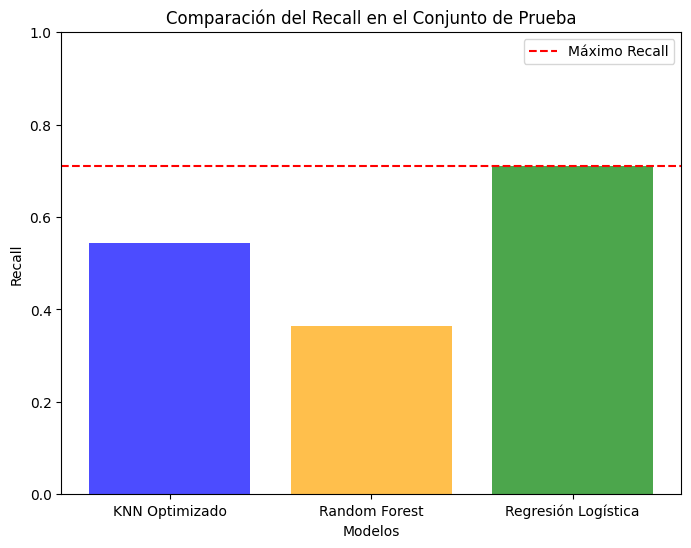

In [25]:
# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(modelos, recall_scores, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title("Comparación del Recall en el Conjunto de Prueba")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.xlabel("Modelos")
plt.axhline(y=max(recall_scores), color='red', linestyle='--', label="Máximo Recall")
plt.legend()
plt.show()

- Mejor modelo: Regresión Logística.
- Justificación: Tiene el mejor recall para la clase 1 (71%), lo cual es crucial para capturar la mayoría de los casos positivos. Aunque su precisión para esta clase es baja, esto es aceptable en un escenario donde los falsos negativos son más costosos que los falsos positivos.

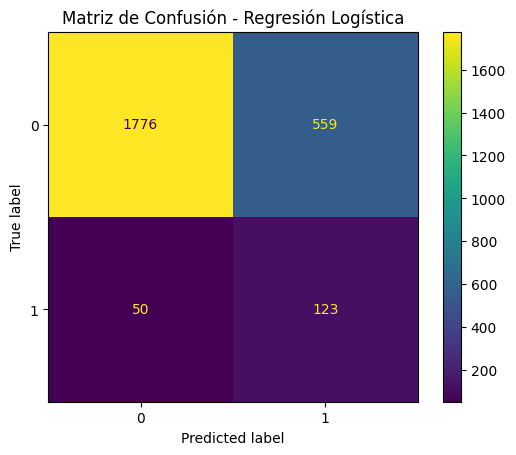

In [26]:
# Matriz de confusión para Regresión Logística
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

True Negatives (TN): 1776
- Casos correctamente clasificados como "Sin dificultades financieras".

False Positives (FP): 559
- Casos clasificados como "Con dificultades financieras" que realmente no las tienen (errores de tipo I).

True Positives (TP): 123
- Casos correctamente clasificados como "Con dificultades financieras".

False Negatives (FN): 50
- Casos clasificados como "Sin dificultades financieras" que realmente tienen dificultades (errores de tipo II).


In [27]:
# Probabilidades del modelo
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Ajustar el umbral (0.4)
threshold = 0.4
y_pred_adjusted = (y_proba_logreg >= threshold).astype(int)

# Evaluar con el nuevo umbral
print("\nResultados con umbral ajustado (0.4):\n")
print(classification_report(y_test, y_pred_adjusted))


Resultados con umbral ajustado (0.4):

              precision    recall  f1-score   support

           0       0.98      0.68      0.80      2335
           1       0.15      0.78      0.26       173

    accuracy                           0.69      2508
   macro avg       0.57      0.73      0.53      2508
weighted avg       0.92      0.69      0.77      2508



Con el umbral ajustado, el modelo logra un mejor recall para la clase minoritaria (1), pero esto afecta otras métricas como la precisión y la exactitud general.

Clase 0 (sin dificultades financieras):

- Precisión: 98% (muy alta).
- Recall: 68% (disminuyó en comparación con el modelo con umbral estándar).
- F1-score: 80%.

Clase 1 (con dificultades financieras):

- Precisión: 15% (muy baja, indicando muchos falsos positivos).
- Recall: 78% (mejorado significativamente del 71% con el umbral original).
- F1-score: 26%.

Exactitud General: 69% (disminuyó del 76% original debido al aumento de falsos positivos).

Promedio macro: Recall promedio entre las clases es 73%, mostrando que el modelo detecta bien ambas clases, aunque desequilibradamente.



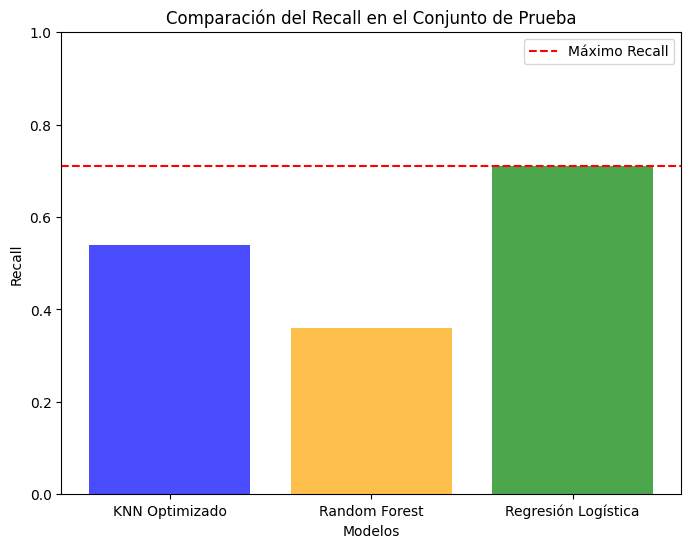

In [28]:
# Recall final de los modelos
modelos = ['KNN Optimizado', 'Random Forest', 'Regresión Logística']
recall_scores = [0.54, 0.36, 0.71]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(modelos, recall_scores, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title("Comparación del Recall en el Conjunto de Prueba")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.xlabel("Modelos")
plt.axhline(y=max(recall_scores), color='red', linestyle='--', label="Máximo Recall")
plt.legend()
plt.show()

- El ajuste del umbral a 0.4 mejora el recall de la clase minoritaria, lo cual es deseable si el objetivo es minimizar los falsos negativos.
Sin embargo, genera una alta tasa de falsos positivos, lo que podría tener implicaciones operativas (por ejemplo, alertar a muchas personas que no están realmente en riesgo financiero).

- Se considera que el umbral ajustado podría ser la mejor opción.